Import libraries

In [47]:
import os 
import collections
import numpy as np
from tqdm import tqdm
from utils import load_pickle
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


Settings

In [48]:
data_folder = "/data/rbg/users/klingmin/projects/MS_processing/data/nist2023/frags_preds"
results_folder = "/data/rbg/users/klingmin/projects/ML_MS_analysis/FP_prediction/mist/ls_results/MIST_nist2023_2025-04-23_14-09/"
split = load_pickle(os.path.join(results_folder, "best_split.pkl"))
data_ids = load_pickle(os.path.join(results_folder, "data_ids.pkl")) 

Get the train and test data

In [49]:
train_ids = [data_ids[i] for i in split["train_indices"]]
test_ids = [data_ids[i] for i in split["test_indices"]]

print(len(train_ids), len(test_ids))

# train_data = [load_pickle(os.path.join(data_folder, f"{i}.pkl")) for i in train_ids]
# test_data = [load_pickle(os.path.join(data_folder, f"{i}.pkl")) for i in test_ids]

372616 2995


Look at the overlap for molecules

In [50]:
ratio = len(test_ids) / (len(train_ids) + len(test_ids)) * 100
print(ratio)

# train_mols = set([r["inchikey_original"][:14] for r in train_data])
# test_mols = set([r["inchikey_original"][:14] for r in test_data])

# len(train_mols.intersection(test_mols)) / len(test_ids) * 100

0.7973674892375356


In [33]:
train_data[0].keys()

dict_keys(['id_', 'name', 'precursor_type', 'precursor_MZ', 'precursor_MZ_final', 'spectrum_type', 'link', 'instrument_type', 'instrument', 'ionization', 'ionmode', 'collision_energy', 'NCE', 'inchikey_original', 'inchikey_full', 'smiles', 'formula', 'exact_mass', 'peaks', 'peak_comments', 'peak_comments_processed', 'FPs', 'kingdom', 'superclass', 'class', 'subclass', 'formula_corrected', 'frags'])

Look at the distribution of instrument

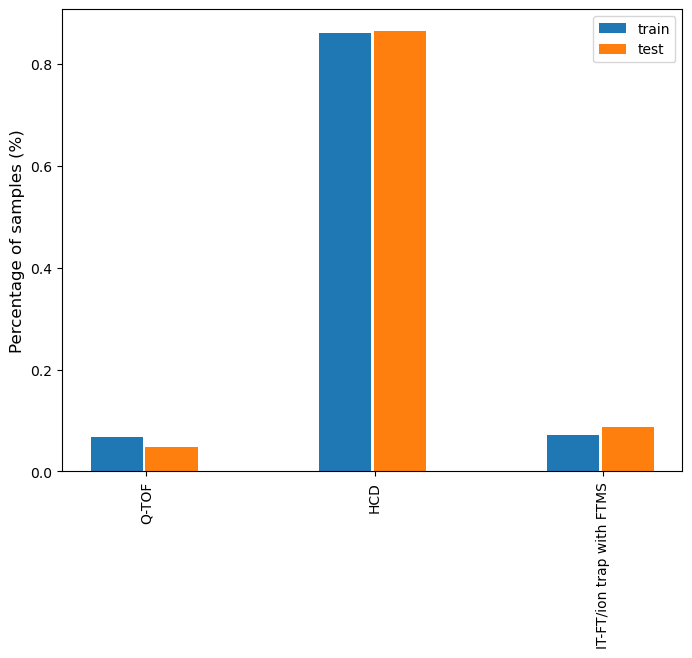

[0.06694346047765731, 0.8617758668381857, 0.07128067268415696]
[0.0476629766297663, 0.8646986469864698, 0.08763837638376384]
Chi-squared: 30.05643777446734
p-value: 2.9739075566889787e-07
Expected frequencies:
[[2.48648427e+04 3.20899423e+05 2.65947347e+04]
 [2.17157282e+02 2.80257741e+03 2.32265306e+02]]


In [46]:
train_instruments = collections.Counter([r["instrument_type"] for r in train_data])
test_instruments = collections.Counter([r["instrument_type"] for r in test_data])

unique_instruments = set(list(train_instruments.keys()) + list(test_instruments.keys()))

train_instrument_counts = [train_instruments[i] if i in train_instruments else 0 for i in unique_instruments]
test_instrument_counts = [test_instruments[i] if i in test_instruments else 0 for i in unique_instruments]

plt.figure(figsize=(8, 6))
bar_width = 0.23

train_bars = np.arange(len(unique_instruments))
test_bars = [x + bar_width + 0.01 for x in train_bars]

plt.bar(train_bars, [x / len(train_data) for x in train_instrument_counts], width = bar_width, label ='train') 
plt.bar(test_bars, [x / len(test_data) for x in test_instrument_counts], width = bar_width, label ='test') 

plt.ylabel('Percentage of samples (%)', fontsize = 12)
unique_instruments = [str(u) for u in unique_instruments]
plt.xticks([r + bar_width - 0.1 for r in range(len(unique_instruments))], unique_instruments, rotation = 90)

plt.legend()
plt.show()

print([x / len(train_data) for x in train_instrument_counts])
print([x / len(test_data) for x in test_instrument_counts])
chi2, p, dof, expected = chi2_contingency(np.array([train_instrument_counts, test_instrument_counts]))

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Expected frequencies:\n{expected}")

Look at the distribution of adduct

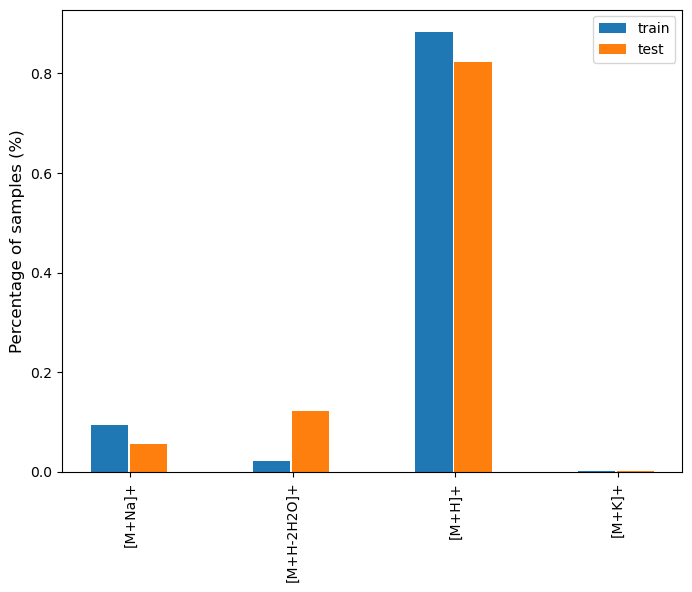

Chi-squared: 1463.2563316512144
p-value: 0.0
Expected frequencies:
[[3.43658655e+04 8.49580185e+03 3.29090882e+05 4.06450264e+02]
 [3.00134533e+02 7.41981465e+01 2.87411758e+03 3.54973630e+00]]


In [36]:
train_adducts = collections.Counter([r["precursor_type"] for r in train_data])
test_adducts = collections.Counter([r["precursor_type"] for r in test_data])

unique_adducts = set(list(train_adducts.keys()) + list(test_adducts.keys()))

train_adduct_counts = [train_adducts[i] if i in train_adducts else 0 for i in unique_adducts]
test_adduct_counts = [test_adducts[i] if i in test_adducts else 0 for i in unique_adducts]

plt.figure(figsize=(8, 6))
bar_width = 0.23

train_bars = np.arange(len(unique_adducts))
test_bars = [x + bar_width + 0.01 for x in train_bars]

plt.bar(train_bars, [x / len(train_data) for x in train_adduct_counts], width = bar_width, label ='train') 
plt.bar(test_bars, [x / len(test_data) for x in test_adduct_counts], width = bar_width, label ='test') 

plt.ylabel('Percentage of samples (%)', fontsize = 12)
plt.xticks([r + bar_width - 0.1 for r in range(len(unique_adducts))], unique_adducts, rotation = 90)

plt.legend()
plt.show()

chi2, p, dof, expected = chi2_contingency(np.array([train_adduct_counts, test_adduct_counts]))

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Expected frequencies:\n{expected}")

In [37]:
train_energies = collections.Counter([r["collision_energy"] for r in train_data])
test_energies = collections.Counter([r["collision_energy"] for r in test_data])

energy_bins = ["-", "0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-150", "150-"]
train_energies_binned = {"-": 0, "0-20": 0, "20-40": 0, "40-60": 0, "60-80": 0, "80-100": 0, "100-120":0, "120-150": 0, "150-": 0}
test_energies_binned = {"-": 0, "0-20": 0, "20-40": 0, "40-60": 0, "60-80": 0, "80-100": 0, "100-120":0, "120-150": 0, "150-": 0}

for e,c in train_energies.items():

    if e == "-": train_energies_binned["-"] += c 
    elif e is None: train_energies_binned["-"] += c
    elif e < 20: train_energies_binned["0-20"] += c 
    elif e < 40: train_energies_binned["20-40"] += c 
    elif e < 60: train_energies_binned["40-60"] += c 
    elif e < 80: train_energies_binned["60-80"] += c 
    elif e < 100: train_energies_binned["80-100"] += c 
    elif e < 120: train_energies_binned["100-120"] += c 
    elif e < 150: train_energies_binned["120-150"] += c 
    else: train_energies_binned["150-"] += c 

for e,c in test_energies.items():

    if e == "-": test_energies_binned["-"] += c 
    elif e is None: test_energies_binned["-"] += c
    elif e < 20: test_energies_binned["0-20"] += c 
    elif e < 40: test_energies_binned["20-40"] += c 
    elif e < 60: test_energies_binned["40-60"] += c 
    elif e < 80: test_energies_binned["60-80"] += c 
    elif e < 100: test_energies_binned["80-100"] += c 
    elif e < 120: test_energies_binned["100-120"] += c 
    elif e < 150: test_energies_binned["120-150"] += c 
    else: test_energies_binned["150-"] += c 

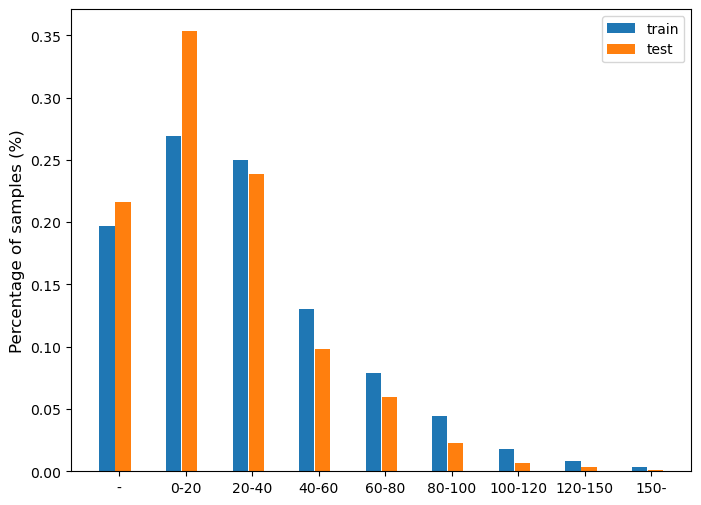

[73309, 100310, 93133, 48377, 29408, 16557, 6803, 3135, 1327]
[702, 1149, 775, 320, 194, 74, 22, 12, 4]
Chi-squared: 200.41882766043216
p-value: 9.357511146459131e-40
Expected frequencies:
[[1.00601174e+05 9.31140166e+04 4.82852714e+04 2.93517178e+04
  1.64903864e+04 6.76729526e+03 3.12039241e+03 1.31974652e+03]
 [8.57826426e+02 7.93983422e+02 4.11728614e+02 2.50282162e+02
  1.40613561e+02 5.77047414e+01 2.66075928e+01 1.12534814e+01]]


In [38]:

train_binned_energy_counts = [train_energies_binned[i] for i in test_energies_binned.keys()]
test_binned_energy_counts = [test_energies_binned[i] for i in test_energies_binned.keys()]

plt.figure(figsize=(8, 6))
bar_width = 0.23

train_bars = np.arange(9)
test_bars = [x + bar_width + 0.01 for x in train_bars]

plt.bar(train_bars, [x / len(train_data) for x in train_binned_energy_counts], width = bar_width, label ='train') 
plt.bar(test_bars, [x / len(test_data) for x in test_binned_energy_counts], width = bar_width, label ='test') 

plt.ylabel('Percentage of samples (%)', fontsize = 12)
plt.xticks([r + bar_width - 0.05 for r in range(len(energy_bins))], energy_bins)

plt.legend()
plt.show()

print(train_binned_energy_counts)
print(test_binned_energy_counts)

chi2, p, dof, expected = chi2_contingency(np.array([train_binned_energy_counts[1:], test_binned_energy_counts[1:]]))

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Expected frequencies:\n{expected}")


Analyze the out of vocab rate

In [30]:
train_formula = set()

for r in tqdm(train_data):

    formula = set([f["comment"]["f_pred"] for f in r["peaks"] if f["comment"]["f_pred"] != ""])
    train_formula.update(formula)

test_formula = set()

for r in tqdm(test_data):

    formula = set([f["comment"]["f_pred"] for f in r["peaks"] if f["comment"]["f_pred"] != ""])
    test_formula.update(formula)


100%|██████████| 3252/3252 [00:00<00:00, 50235.81it/s]


In [31]:
len(train_formula.intersection(test_formula)) / len(test_formula) * 100

90.78393881453155